#Creating a Car price prediction model using random forest regression algorithm
### Suraj Shetty
### Seat No-36


In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
# Load the cleaned dataset
car_df = pd.read_csv("/content/Cleaned_Car_Price_Dataset.csv")

In [37]:
# Separate features (X) and target (y)
X = car_df.drop('Price', axis=1)
y = car_df['Price']

In [38]:
# Display basic info
print("Dataset Overview:")
print(car_df.head())

Dataset Overview:
        Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi      Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen    Golf  2003          2.6    Hybrid  Semi-automatic   286618   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4            2  11171  
3      2            1  11780  
4      3            3   2867  


In [39]:
print(car_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         9994 non-null   object 
 1   Model         9994 non-null   object 
 2   Year          9994 non-null   int64  
 3   Engine_Size   9994 non-null   float64
 4   Fuel_Type     9994 non-null   object 
 5   Transmission  9994 non-null   object 
 6   Mileage       9994 non-null   int64  
 7   Doors         9994 non-null   int64  
 8   Owner_Count   9994 non-null   int64  
 9   Price         9994 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 780.9+ KB
None


In [40]:
# Encode categorical variables using Label Encoding
categorical_columns = X.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [41]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [43]:
#Predict the model
y_pred = rf_model.predict(X_test)
y_pred

#Loading label encoders
label_encoders = {
    'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'Hybrid': 2, 'Electric': 3},
    'Transmission': {'Manual': 0, 'Automatic': 1, 'Semi-automatic': 2},
    'Brand': {'Toyota': 0, 'Honda': 1, 'Ford': 2},  # Adjustment done based on training
    'Model': {'Camry': 0, 'Accord': 1, 'Focus': 2}
}
# Define new car data (can be replaced these values with real inputs)
new_car_data = pd.DataFrame({
    'Brand': ['Toyota'],
    'Model': ['Camry'],
    'Year': [2022],
    'Engine_Size': [2.5],
    'Fuel_Type': ['Petrol'],
    'Transmission': ['Automatic'],
    'Mileage': [15000],
    'Doors': [4],
    'Owner_Count': [1]
})

# Encode categorical features using saved label encoders
for col in label_encoders.keys():
    new_car_data[col] = new_car_data[col].map(label_encoders[col])


# Ensure the column order matches the training data
new_car_data = new_car_data[['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission', 'Mileage', 'Doors', 'Owner_Count']]

# Predict the price
predicted_price = rf_model.predict(new_car_data)

print(f"Predicted Car Price: ${predicted_price[0]:,.2f}")

Predicted Car Price: $12,336.37


In [53]:
#Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:,.2f}")
print(f"R² Score: {r2:,.2f}")

RMSE: 461.32
R² Score: 0.98


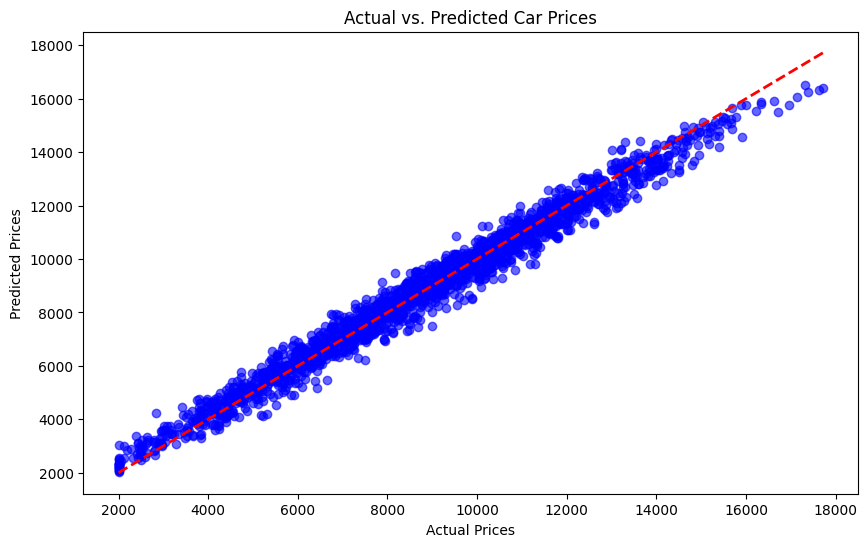

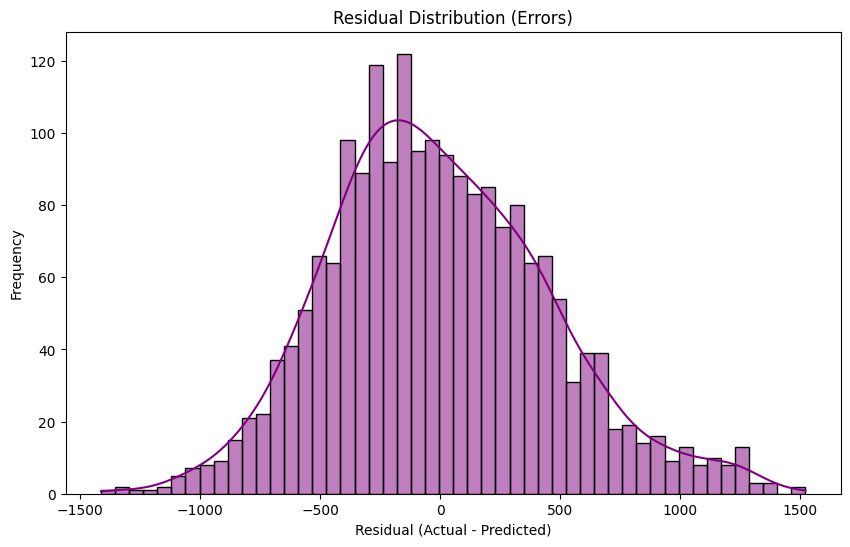

<ipython-input-54-db83f53d8a48>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")


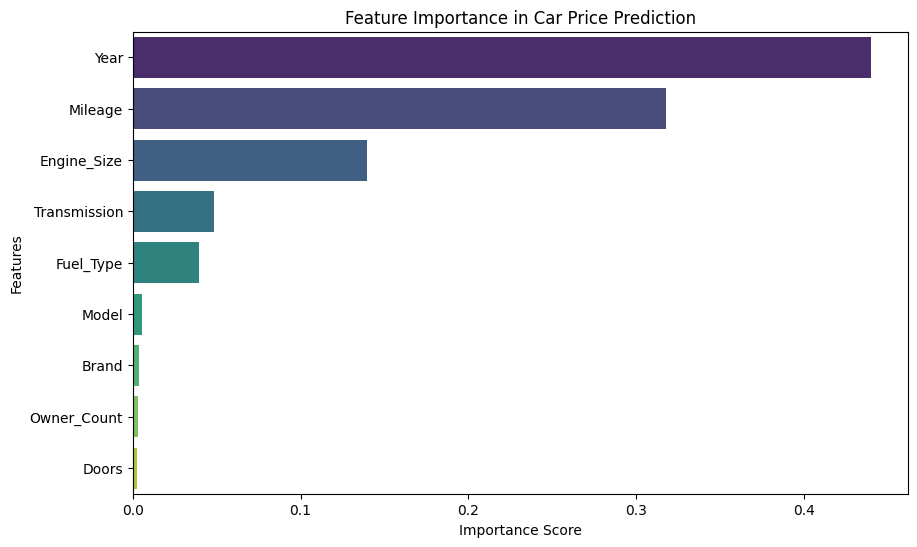

In [54]:
#Model interpretation using graph plotting

# 1. Actual vs. Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Actual vs. Predicted Car Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

# 2. Residual Plot (Errors: Actual - Predicted)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple', bins=50)
plt.title("Residual Distribution (Errors)")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()

# 3. Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.title("Feature Importance in Car Price Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [55]:
# Save the trained model
joblib.dump(rf_model, "car_price_prediction_model")
print("Model saved successfully!")

Model saved successfully!
